# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

# import data 

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer=load_breast_cancer()

In [4]:
load_breast_cancer().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data=pd.DataFrame(breast_cancer.data)
data.columns=breast_cancer.feature_names

In [6]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data.shape

(569, 30)

In [8]:
#count the number of empty(Nan) in each columns.
data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [9]:
data.mean(axis=0)

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

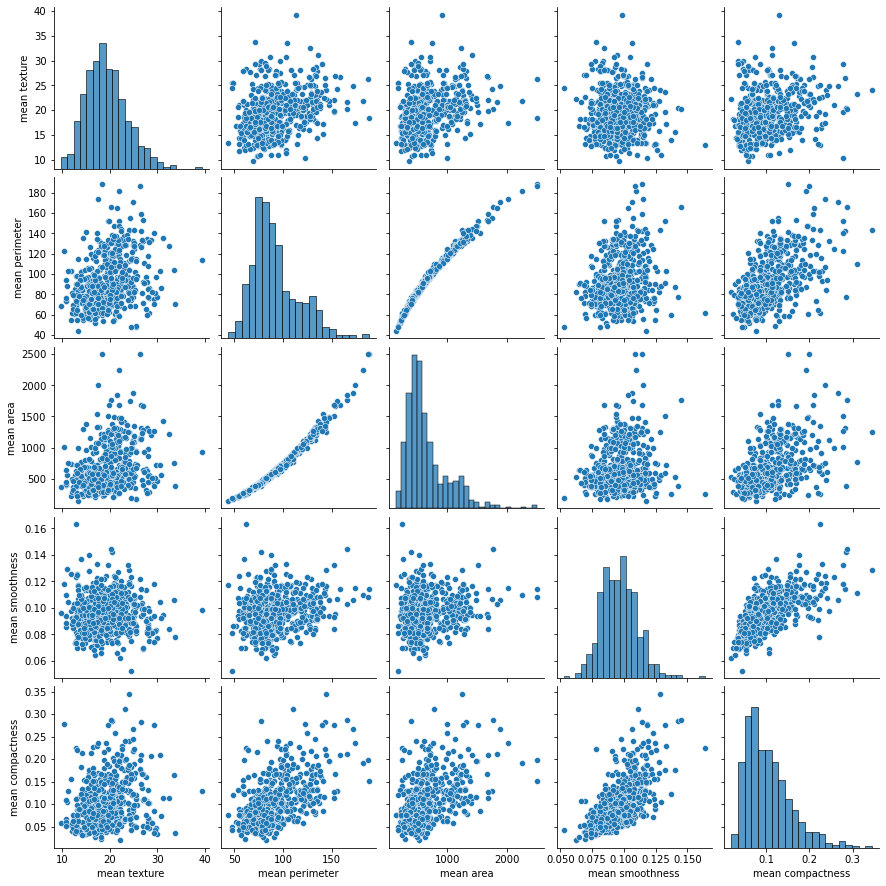

In [10]:
sns.pairplot(data.iloc[:,1:6])

<AxesSubplot:>

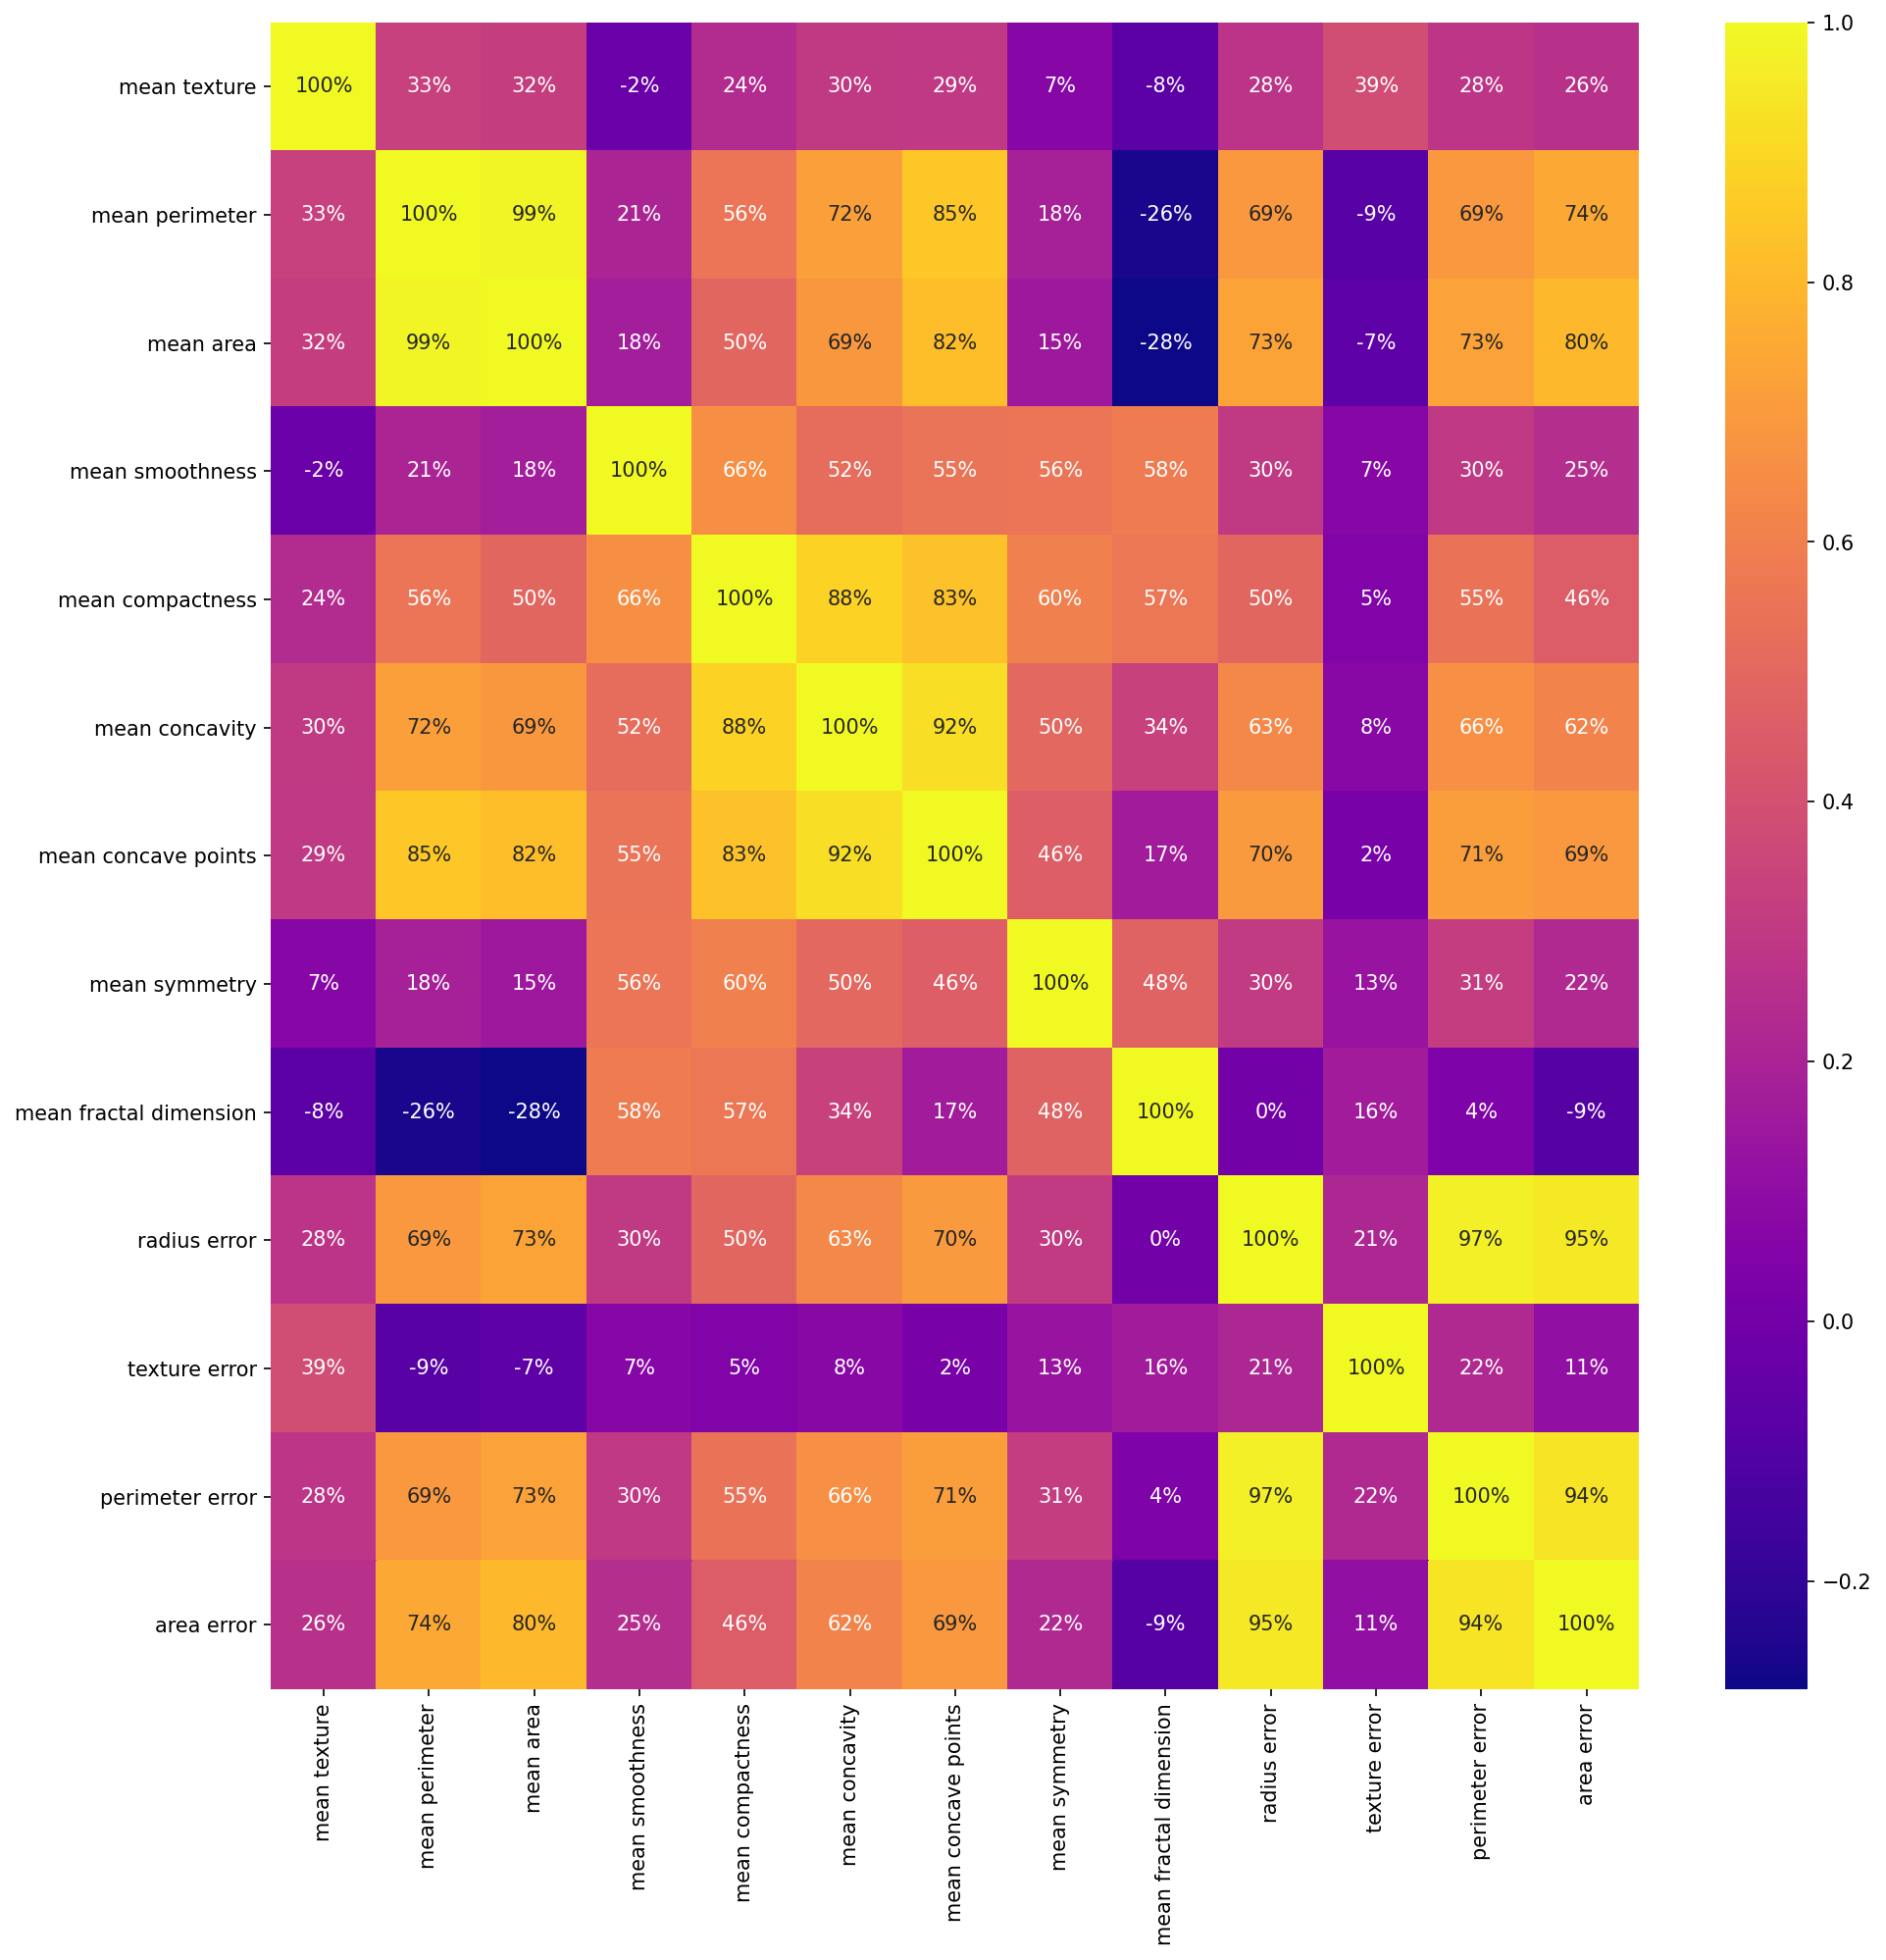

In [11]:
fig,ax=plt.subplots(figsize=(15,15),dpi=150)
sns.heatmap(data.iloc[:,1:14].corr(),annot=True,cmap="plasma",fmt='.0%')

# Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
scaler.fit(data)

StandardScaler()

In [15]:
scaled_X=scaler.transform(data)

In [16]:
scaled_X.mean()

-6.118909323768877e-16

In [17]:
scaled_X.mean(axis=0)

array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
        6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
       -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
        1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
        7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
       -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
       -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
       -2.28956670e-15,  2.57517109e-15])

# PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca_model=PCA(n_components=4)

In [20]:
pca_model.fit(scaled_X)

PCA(n_components=4)

In [21]:
x_pca = pca_model.transform(scaled_X)

In [22]:
U = pca_model.components_          # Principal Components (directions)
S = pca_model.explained_variance_  # importance of ecah direction (variances)
info_t=1-np.sum(pca_model.explained_variance_ratio_) # information have we thrown away

In [23]:
df_comp=pd.DataFrame(U,index=['pc1','pc2','pc3','pc4'],columns=breast_cancer.feature_names)
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
pc1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
pc2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
pc3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
pc4,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077054


# variance explaned

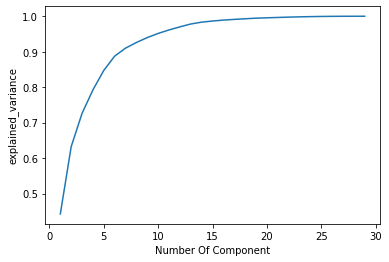

In [24]:
explained_variance=[]

for n in range(1,30):
    
    pca=PCA(n_components=n)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))
    
plt.plot(range(1,30),explained_variance);
plt.xlabel('Number Of Component');
plt.ylabel('explained_variance');

# making new data after PCA

In [25]:
new_data=pd.DataFrame(x_pca)
new_data['target']=breast_cancer.target
new_data.mean()

0         4.339431e-16
1        -3.824318e-17
2         7.804731e-18
3        -9.365678e-18
target    6.274165e-01
dtype: float64

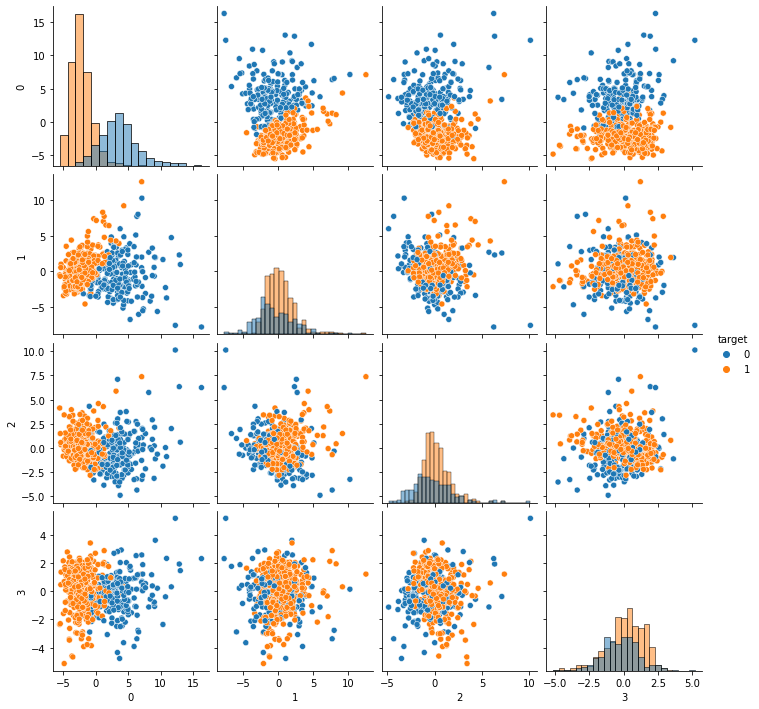

In [26]:
sns.pairplot(new_data,hue='target',diag_kind='hist')

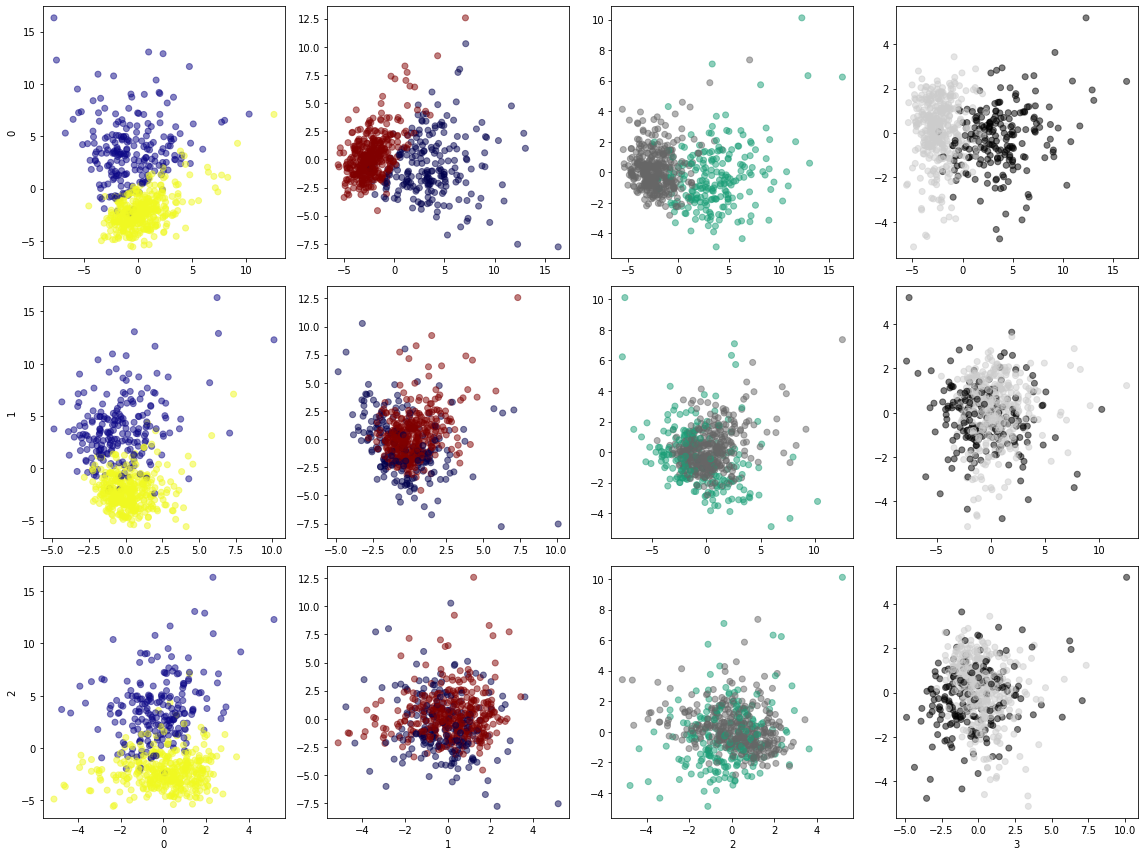

In [27]:
fig,ax=plt.subplots(nrows=3, ncols=4,figsize=(16,12))
ax[0][0].scatter(new_data[1],new_data[0],c=new_data['target'],cmap=plt.cm.get_cmap('plasma', 10),alpha=0.5)
ax[0][0].set_ylabel("0")
ax[1][0].scatter(new_data[2],new_data[0],c=new_data['target'],cmap=plt.cm.get_cmap('plasma', 10),alpha=0.5)
ax[1][0].set_ylabel("1")
ax[2][0].scatter(new_data[3],new_data[0],c=new_data['target'],cmap=plt.cm.get_cmap('plasma', 10),alpha=0.5)
ax[2][0].set_ylabel("2")
ax[2][0].set_xlabel("0")

ax[0][1].scatter(new_data[0],new_data[1],c=new_data['target'],cmap=plt.cm.get_cmap('seismic', 10),alpha=0.5)
ax[1][1].scatter(new_data[2],new_data[1],c=new_data['target'],cmap=plt.cm.get_cmap('seismic', 10),alpha=0.5)
ax[2][1].scatter(new_data[3],new_data[1],c=new_data['target'],cmap=plt.cm.get_cmap('seismic', 10),alpha=0.5)
ax[2][1].set_xlabel("1")

ax[0][2].scatter(new_data[0],new_data[2],c=new_data['target'],cmap=plt.cm.get_cmap('Dark2', 10),alpha=0.5)
ax[1][2].scatter(new_data[1],new_data[2],c=new_data['target'],cmap=plt.cm.get_cmap('Dark2', 10),alpha=0.5)
ax[2][2].scatter(new_data[3],new_data[2],c=new_data['target'],cmap=plt.cm.get_cmap('Dark2', 10),alpha=0.5)
ax[2][2].set_xlabel("2")

ax[0][3].scatter(new_data[0],new_data[3],c=new_data['target'],cmap=plt.cm.get_cmap('nipy_spectral', 10),alpha=0.5)
ax[1][3].scatter(new_data[1],new_data[3],c=new_data['target'],cmap=plt.cm.get_cmap('nipy_spectral', 10),alpha=0.5)
ax[2][3].scatter(new_data[2],new_data[3],c=new_data['target'],cmap=plt.cm.get_cmap('nipy_spectral', 10),alpha=0.5)
ax[2][3].set_xlabel("3")
plt.tight_layout()
plt.show()

<AxesSubplot:>

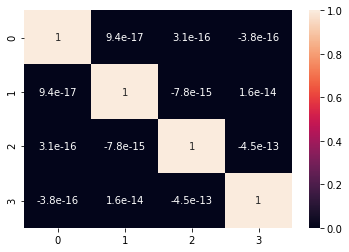

In [28]:
sns.heatmap(new_data.drop('target',axis=1).corr(),annot=True)

<AxesSubplot:>

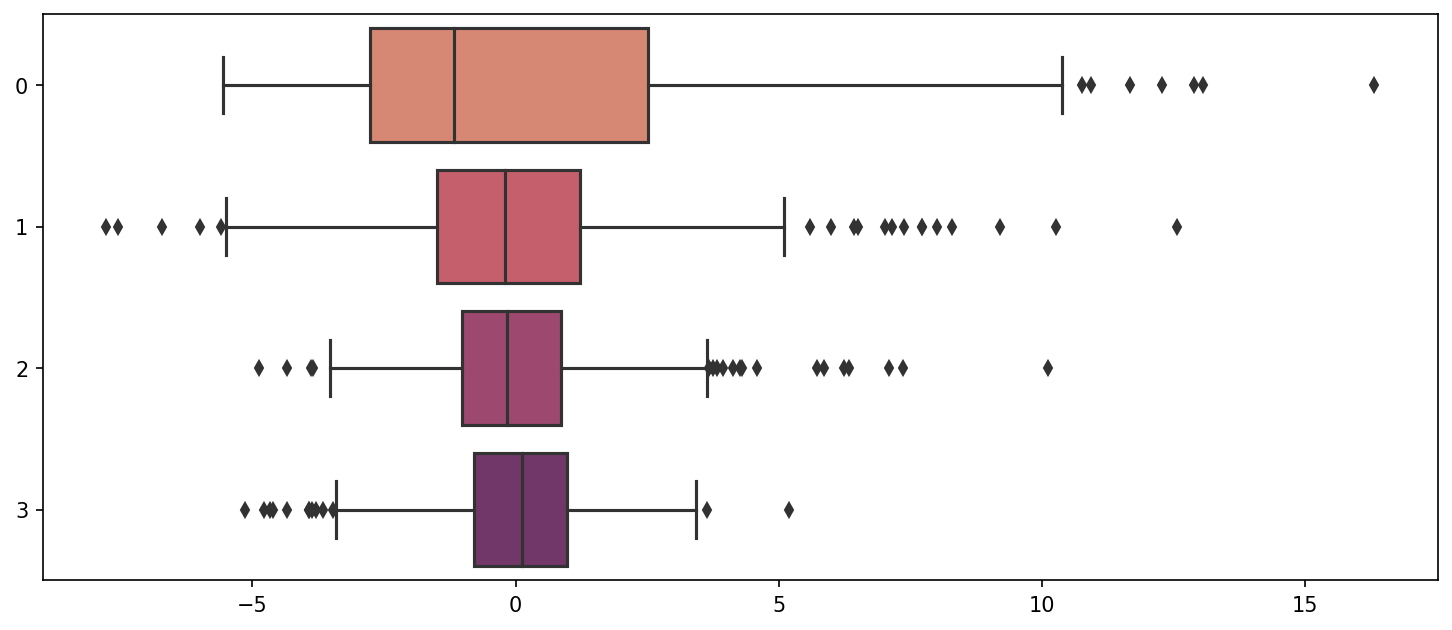

In [29]:
ax,fig=plt.subplots(figsize=(12,5),dpi=150)
sns.boxplot(data=new_data[[0,1,2,3]],orient="h", palette="flare")

# SVM

In [30]:
new_data.head()

,0,1,2,3,target
0,9.192837,1.948583,-1.123166,3.633731,0
1,2.387802,-3.768172,-0.529293,1.118264,0
2,5.733896,-1.075174,-0.551748,0.912083,0
3,7.122953,10.275589,-3.232790,0.152547,0
4,3.935302,-1.948072,1.389767,2.940639,0


In [31]:
new_data.describe()

,0,1,2,3,target
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,4.339431e-16,-3.824318e-17,7.804731e-18,-9.365678e-18,0.627417
std,3.647601e+00,2.387755e+00,1.680152e+00,1.408591e+00,0.483918
min,-5.565736e+00,-7.775853e+00,-4.880361e+00,-5.133988e+00,0.000000
25%,-2.757430e+00,-1.499825e+00,-1.017071e+00,-7.863120e-01,0.000000
50%,-1.173831e+00,-1.959558e-01,-1.557020e-01,1.155657e-01,1.000000
75%,2.508766e+00,1.228297e+00,8.568268e-01,9.694157e-01,1.000000
max,1.631923e+01,1.257319e+01,1.011242e+01,5.194270e+00,1.000000


C:\Users\IT KALA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

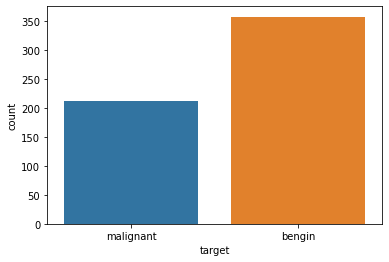

In [32]:
sns.countplot(new_data['target'].map({0:'malignant',1:'bengin'}))

In [33]:
#correlation between the various features and the "target" column
new_data.corr()['target']

0        -0.785491
1         0.188363
2         0.164782
3         0.127566
target    1.000000
Name: target, dtype: float64

<AxesSubplot:>

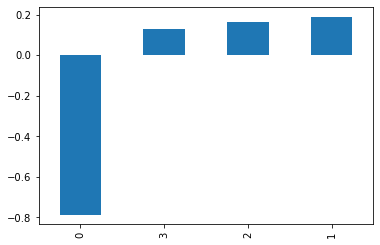

In [34]:
#bar plot of the correlation values
new_data.corr()['target'][:-1].sort_values().plot(kind='bar')

In [35]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [37]:
y = new_data['target']
X = new_data.drop('target',axis=1)

In [38]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [41]:
X_test

,0,1,2,3
285,-4.138883,-1.376508,0.878049,-0.059856
347,-1.206598,-1.317044,-0.930741,1.704790
89,1.259605,1.015577,-0.080593,2.051335
496,-0.229395,1.515903,-2.216283,0.555570
319,-4.026620,-1.402206,3.186500,0.019552
...,...,...,...,...
379,3.765932,5.985295,-4.880361,-1.120873
295,-3.315000,-1.442176,-0.583633,1.784931
27,3.064054,-1.876552,2.581748,0.128484
151,0.083186,7.150360,-0.060010,-1.803082


In [42]:
model = SVC() 
model.fit(X_train, y_train)

SVC()

In [43]:
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.98      0.99       110

    accuracy                           0.99       171
   macro avg       0.98      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [44]:
confusion_matrix(y_test, predictions)
accuracy_score(y_test, predictions)

0.9883040935672515

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {'C': [0.1,0.3,0.5,0.7,1,3,5,10, 100],  
              'gamma': [1,5, 0.1,0.05, 0.01,0.005, 0.001,0.0005, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear','rbf']}  
   
grid = GridSearchCV(SVC(), param_grid, verbose = 3) 

In [47]:
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV 2/5] END ...............C=0.1, gamma=auto, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [48]:
grid.best_params_

{'C': 0.7, 'gamma': 'scale', 'kernel': 'linear'}

In [49]:
grid_pred = grid.predict(X_test)

In [50]:
cm=confusion_matrix(y_test,grid_pred)
accuracy_score(y_test,grid_pred)


0.9883040935672515

In [51]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.98      0.99       110

    accuracy                           0.99       171
   macro avg       0.98      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=2)

In [54]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [55]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [56]:
y_pred = knn.predict(X_test)

In [57]:
confusion_matrix(y_test,y_pred)

array([[ 61,   0],
       [ 10, 100]], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred)

0.9415204678362573

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        61
           1       1.00      0.91      0.95       110

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171



# best_param_KNN

# The first method

In [60]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

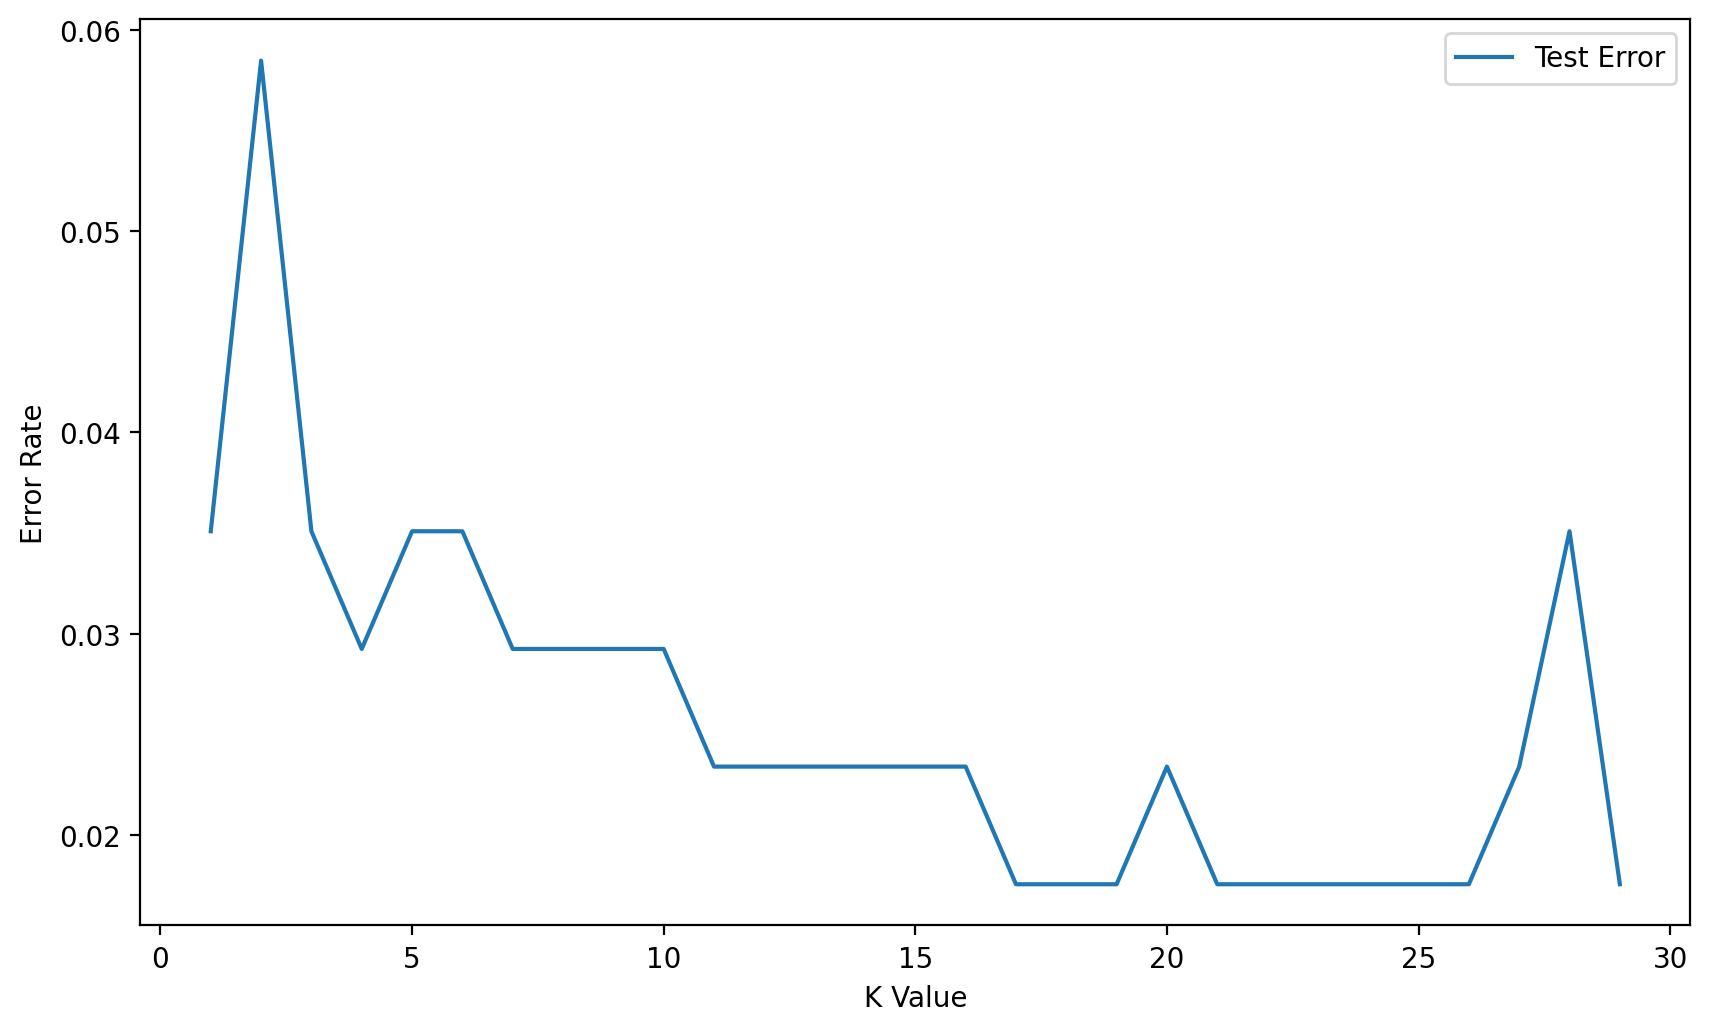

In [61]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

# The second method

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
knn=KNeighborsClassifier()

In [64]:
operations = [('knn',knn)]

In [65]:
pipe = Pipeline(operations)

In [66]:
param_grid = {'knn__n_neighbors': list(range(1,30))}

In [67]:
grid_classifier = GridSearchCV(pipe,param_grid)

In [68]:
grid_classifier.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]})

In [69]:
grid_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('knn', KNeighborsClassifier(n_neighbors=6))],
 'verbose': False,
 'knn': KNeighborsClassifier(n_neighbors=6),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 6,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Text(0, 0.5, 'Accuracy')

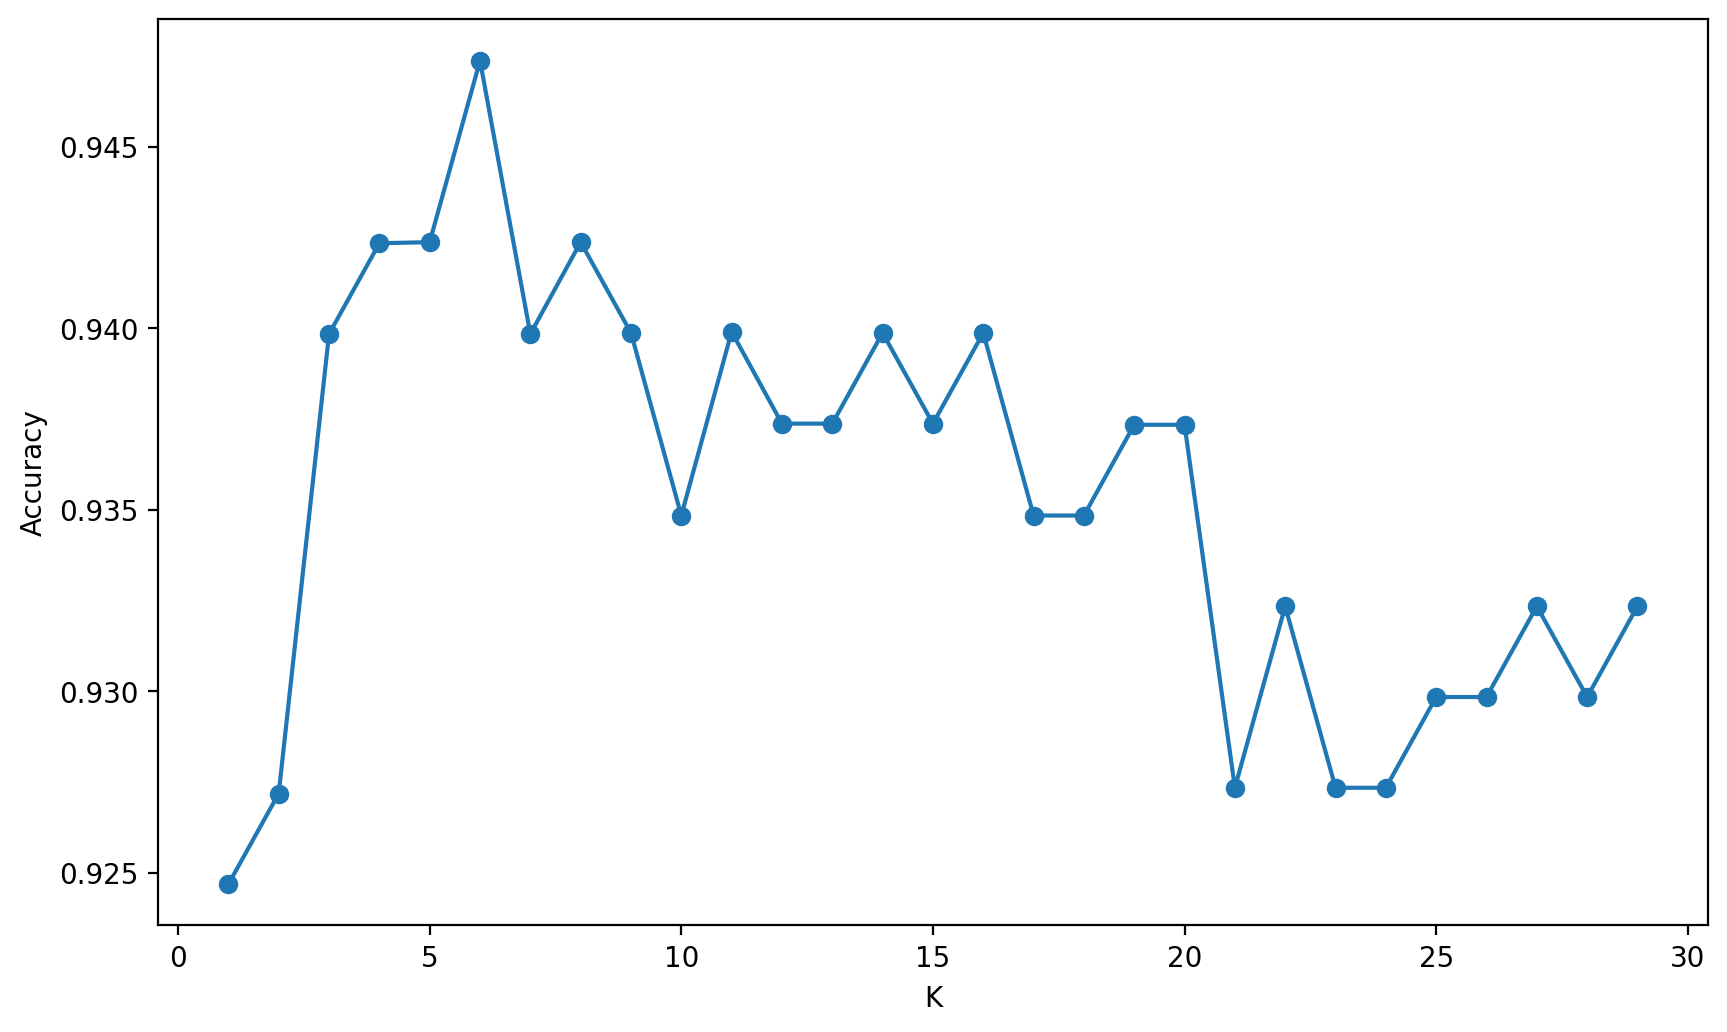

In [70]:
scores =grid_classifier.cv_results_['mean_test_score']
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [71]:
print("KNN best k=",grid_classifier.best_params_['knn__n_neighbors'])

KNN best k= 6


In [72]:
pred = grid_classifier.predict(X_test)

In [73]:
accuracy_score(y_test,pred)

0.9649122807017544

In [74]:
confusion_matrix(y_test,pred)

array([[ 60,   1],
       [  5, 105]], dtype=int64)

In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        61
           1       0.99      0.95      0.97       110

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

